<h2>GROUP 3 Project Team: </h2>
    <ul><li>Temitayo Bakare</li><br><li>Ayomiposi Fajemileyin</li><br><li>Boluwatife Afolabi</li><br><li>Collins Iwuchukwu</li></ul>
<h2> PROJECT TITLE: Breast Cancer Analysis and Prediction </h2>
<h3>Breast cancer is the most common invasive cancer in women and the second leading cause of cancer death in women after lung cancer. Advances in screening and treatment for breast cancer have improved survival rates dramatically since 1989. Early screening leading to detection has, from statistics, led to the increase of survival rates.<br><br>The purpose of our project is to research on the available data and build a machine learning model that helps to prove the possibility of detecting cancer at an early stage.<br><br> Each data attribute represents features and measurements of the cells nuclei that was gotten from various patients. <br><br> Our machine learning model will be built using three different types of models(Decision tree, Logistic regression and Random forest classifier), of which the one that performs best with very good accuracy will be deployed for use in the industry to be able to detect cancer at an early state.</h3>

<h3> Import Libraries and Sub-Libraries<h3>

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


<h3> Load the data set to begin Exploratory Data Analysis <h2>

In [292]:
data = pd.read_csv('breast_cancer.csv')

In [293]:
#counts the number of rows and columns

data.shape

(569, 33)

In [294]:
#inputs are measurements of tumor

for i in data.columns:
    print(i)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


In [295]:
data[60:69]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
60    858970         B       10.170         14.88           64.55      311.9   
61    858981         B        8.598         20.98           54.66      221.8   
62    858986         M       14.250         22.15           96.42      645.7   
63    859196         B        9.173         13.86           59.20      260.9   
64  85922302         M       12.680         23.84           82.69      499.0   
65    859283         M       14.780         23.94           97.40      668.3   
66    859464         B        9.465         21.01           60.11      269.4   
67    859465         B       11.310         19.04           71.80      394.1   
68    859471         B        9.029         17.33           58.79      250.5   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
60          0.11340           0.08061         0.01084             0.012900   
61          0.12430           0.08963         0.03000             0.009259   
62          0.10490           0.20080         0.21350             0.086530   
63          0.07721           0.08751         0.05988             0.021800   
64          0.11220           0.12620         0.11280             0.068730   
65          0.11720           0.14790         0.12670             0.090290   
66          0.10440           0.07773         0.02172             0.015040   
67          0.08139           0.04701         0.03709             0.022300   
68          0.10660           0.14130         0.31300             0.043750   

    ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
60  ...          17.45            69.86       368.6           0.12750   
61  ...          27.04            62.06       273.9           0.16390   
62  ...          29.51           119.10       959.5           0.16400   
63  ...          19.23            65.59       310.1           0.09836   
64  ...          33.47           111.80       888.3           0.18510   
65  ...          33.39           114.60       925.1           0.16480   
66  ...          31.56            67.03       330.7           0.15480   
67  ...          23.84            78.00       466.7           0.12900   
68  ...          22.65            65.50       324.7           0.14820   

    compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
60            0.09866          0.02168               0.02579          0.3557   
61            0.16980          0.09001               0.02778          0.2972   
62            0.62470          0.69220               0.17850          0.2844   
63            0.16780          0.13970               0.05087          0.3282   
64            0.40610          0.40240               0.17160          0.3383   
65            0.34160          0.30240               0.16140          0.3321   
66            0.16640          0.09412               0.06517          0.2878   
67            0.09148          0.14440               0.06961          0.2400   
68            0.43650          1.25200               0.17500          0.4228   

    fractal_dimension_worst  Unnamed: 32  
60                  0.08020          NaN  
61                  0.07712          NaN  
62                  0.11320          NaN  
63                  0.08490          NaN  
64                  0.10310          NaN  
65                  0.08911          NaN  
66                  0.09211          NaN  
67                  0.06641          NaN  
68                  0.11750          NaN  

[9 rows x 33 columns]

In [296]:
#counts the number of empty values in each column

data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<h3> Clean and prepare the data set <h3>

In [297]:
# drop the column with all missing values and the id column

data.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [298]:
#getting new counts of number of rows and columns

data.shape

(569, 31)

In [299]:
#get a count of the number of variables in the didnosis column

data['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [300]:
#get a count of the number of Malognant (M) or Benign (B) cells

data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

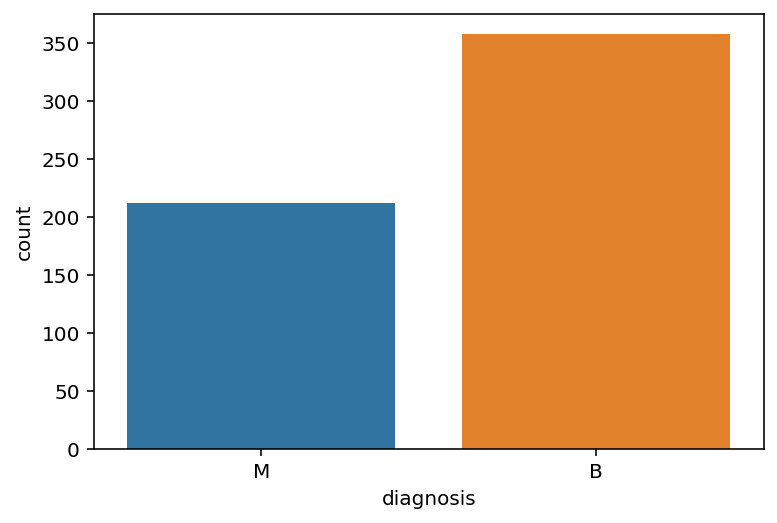

In [270]:
#visualizing the count

sns.countplot(data['diagnosis'], label='counts')

In [301]:
#knowing the data types

data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [302]:
#Encode the categorical data values

labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(data.iloc[:,0].values)
data.iloc[:,0] = labelencoder_Y.fit_transform(data.iloc[:,0].values)

In [303]:
data.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [304]:
#M has been replaced with 1 and B has been replaced with 0 in the diagnosis column

data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

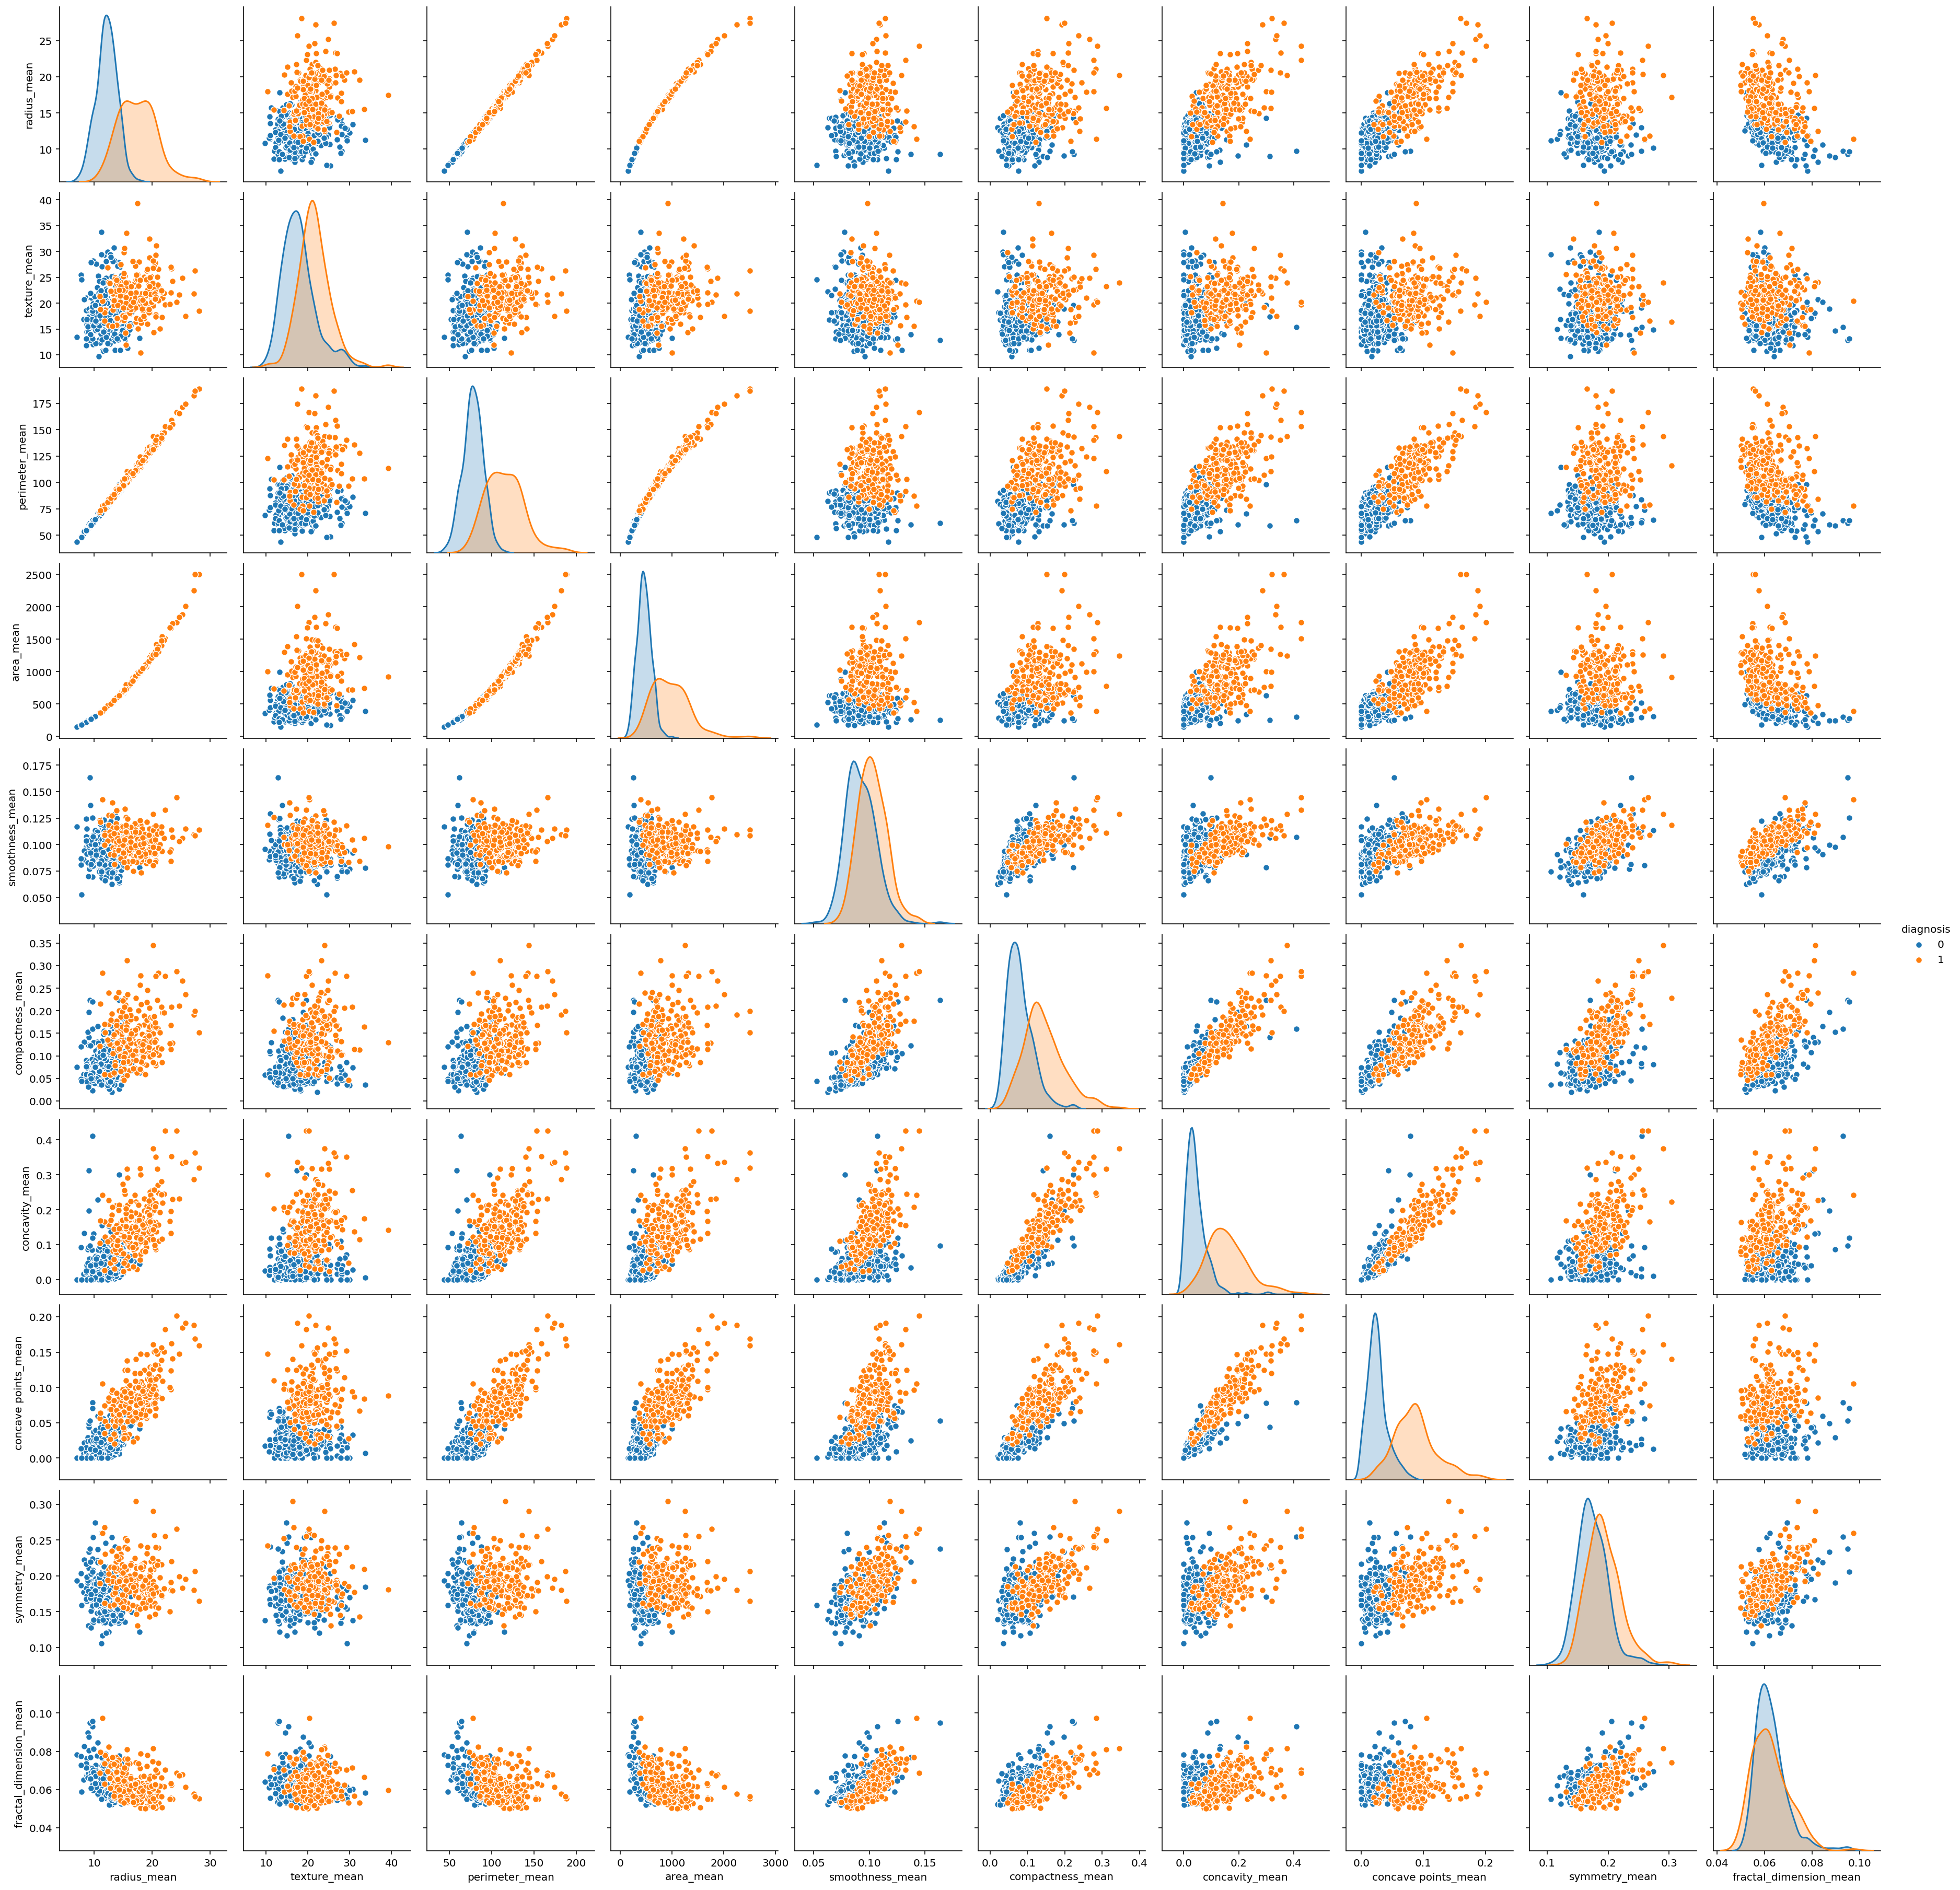

In [275]:
# creating a pairplot to shows relationship between some attributes(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean and concavity_mean)
#generating a pairplot to shows relationship between the mean columns

mean_cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
sns.pairplot(data=data[mean_cols], hue='diagnosis')

In [305]:
# get the correlation of the attributes

data.corr(method='pearson')

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

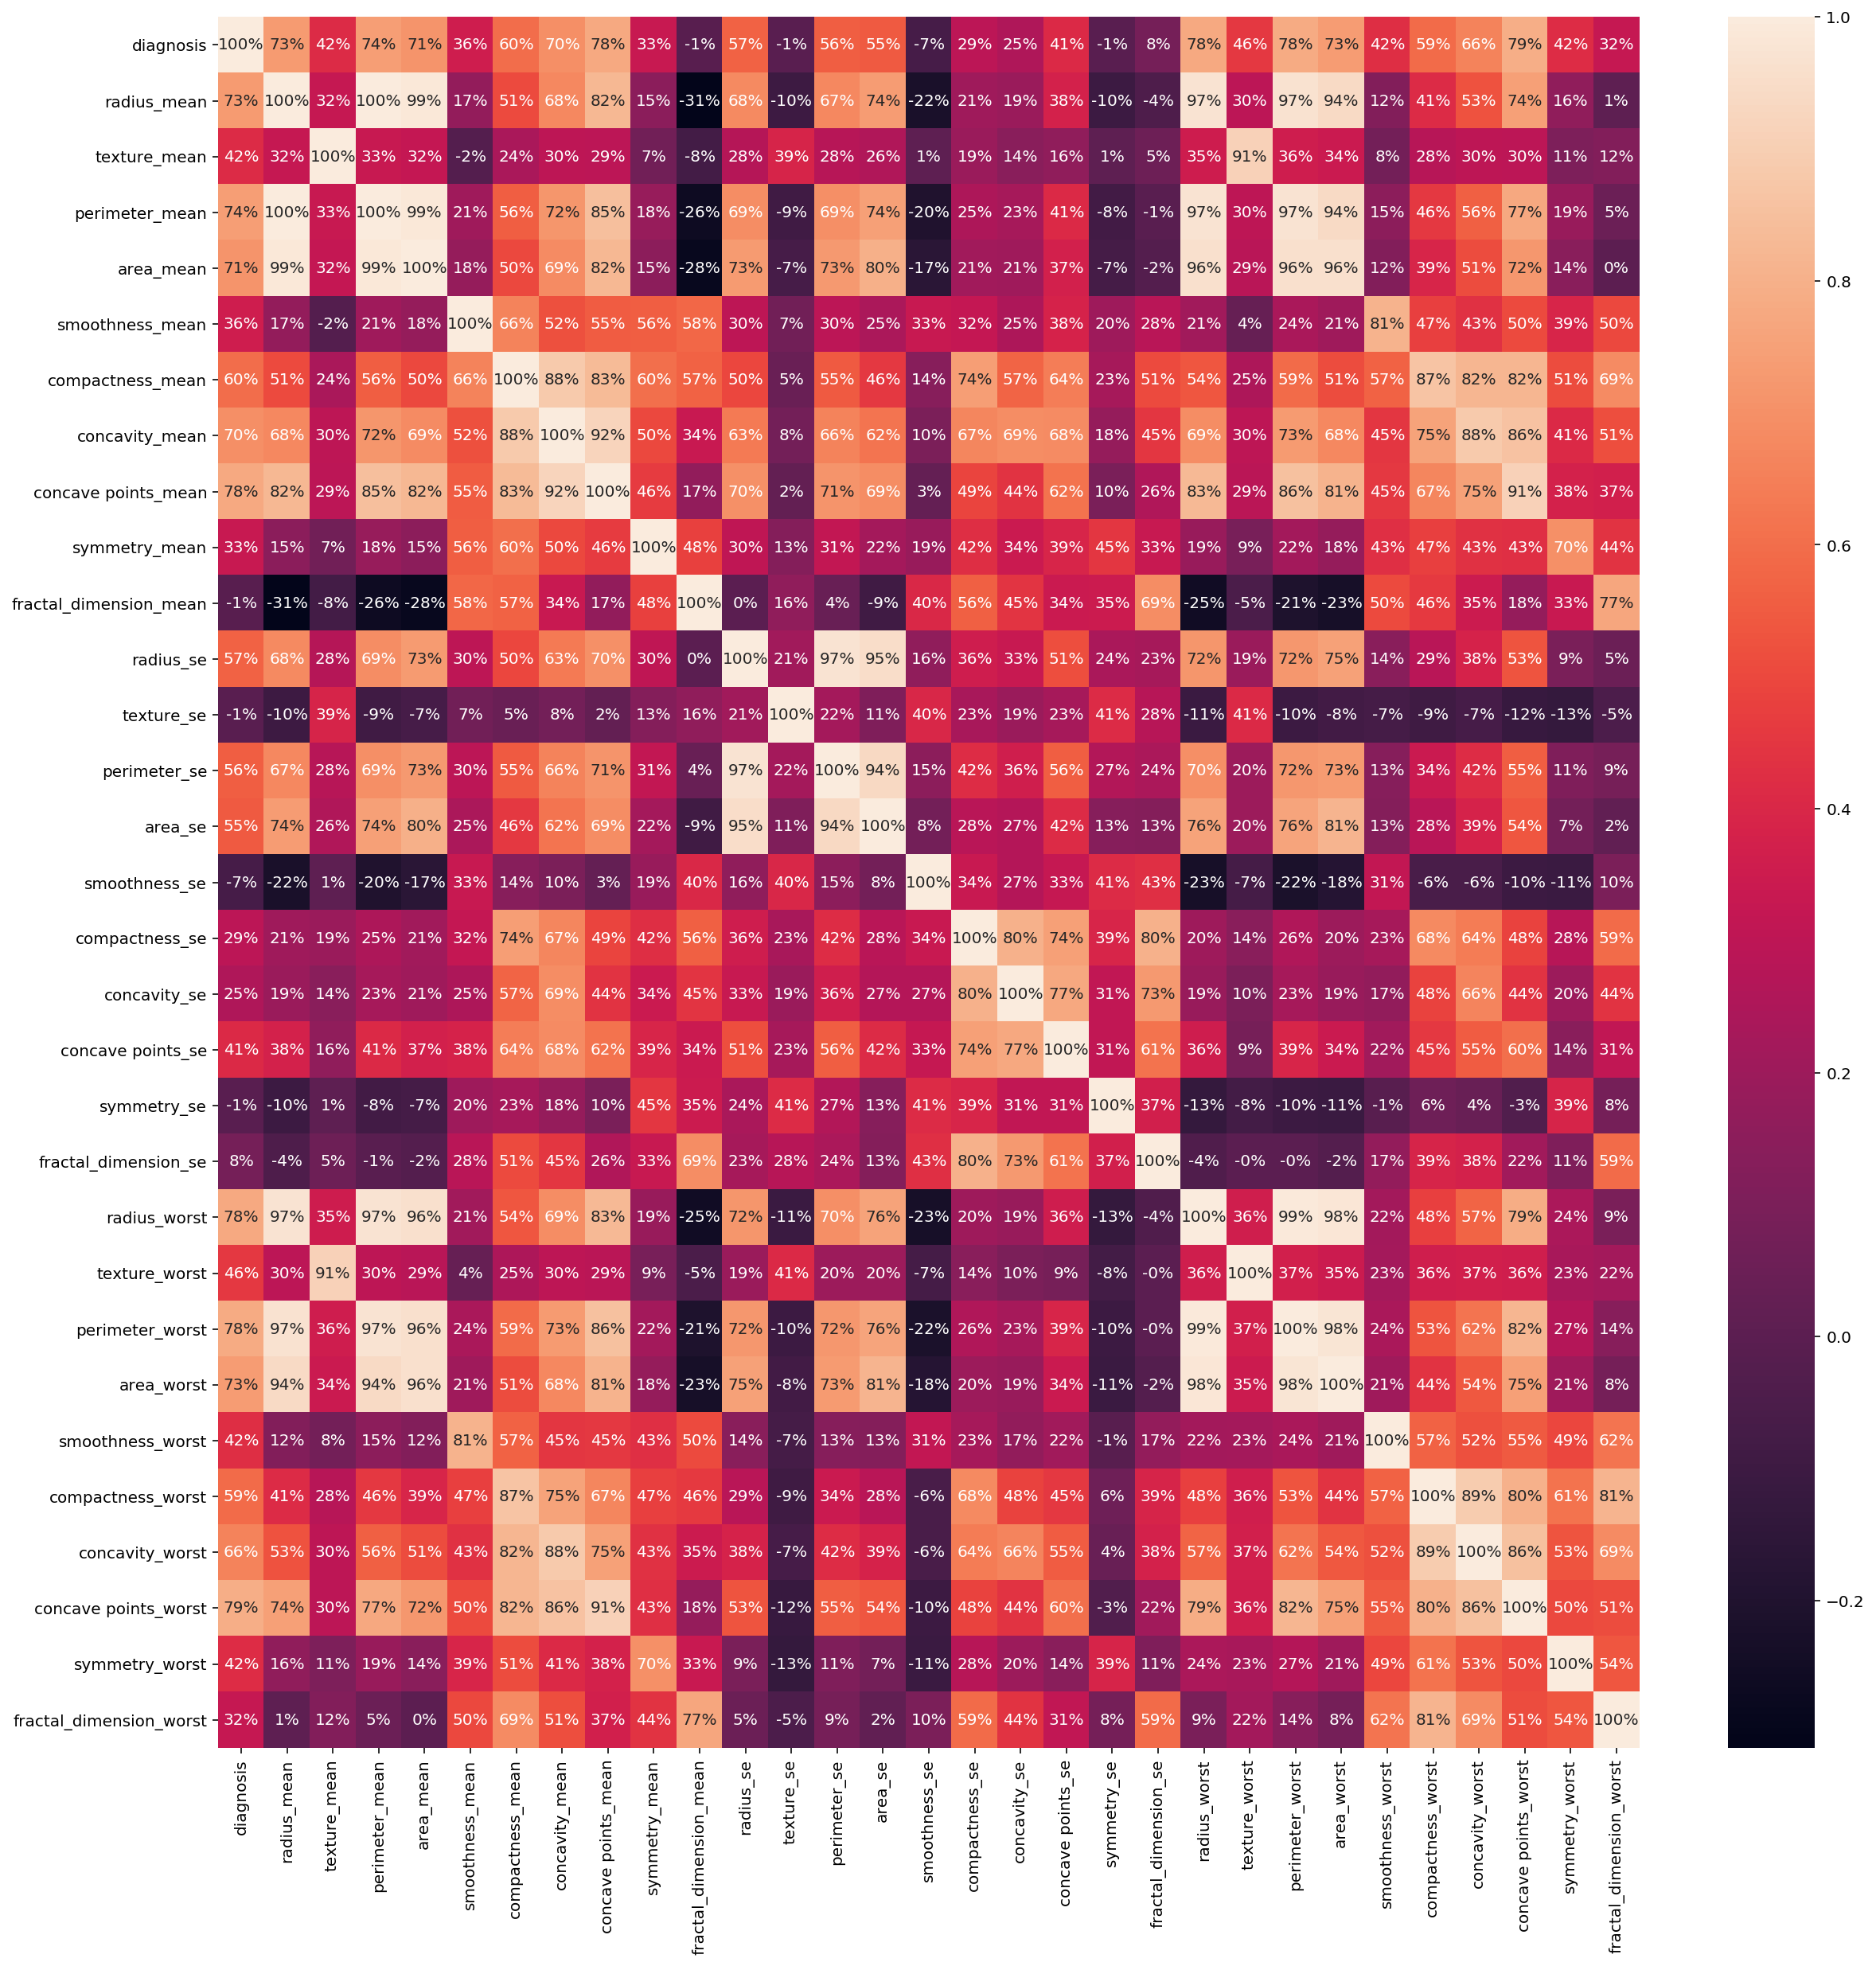

In [277]:
#visualizing the correlation between attributes
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

<h3> There is a very strong correlation between 'radius_mean', 'perimeter_mean' and 'area_mean; with values 1 and 0.99 respectively. Thus, it is clear that they contain thesame information. Therefore, we will frop two of the 3 attribute and leave one to remain in the dataset. We will drop perimeter_mean and area_mean <h3>

 <h3> It is also observed that the attributes that has the suffix "mean" and thesame attribute with suffix "worse" have very strong correlation. Therefore, we drop all attributes with the suffix "worse" <h3>
 
 <h3> Lastly, we observe a strong correlation between the attributes compactness_se, concavity_se and concave points_se, therefore, we will drop two of the three attributes and leave just one of the attribute to remain in the dataset. We chose to leave compactness_se.<h3>

In [306]:
#drop all attributes with suffix "worse","concavity_se","concave points_se" "perimeter_mean" and "area_mean"

data.drop(['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','perimeter_mean','area_mean'], axis = 1, inplace = True)

In [307]:
data.shape

(569, 19)

In [308]:
#splitting the dataset into independent and dependent variables

X = data.drop('diagnosis', axis = 1)
Y = data['diagnosis']

In [309]:
#split dataset into 75% training and 25% testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [310]:
#scale the data to be of thesame range (feature scaling)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [311]:
#create a function for the different models

def models(X_train, Y_train):
    
    #Linear regression model
    logistic_reg = LogisticRegression(random_state=0)
    logistic_reg.fit(X_train,Y_train)
    
    #Decision Tree model
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    decision_tree.fit(X_train,Y_train)
    
    #Random Forest Classifier
    ran_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    ran_forest.fit(X_train, Y_train)
    
    
    
    #print the model accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:' , logistic_reg.score(X_train, Y_train))
    print()
    print('[1]Decision Tree Training Accuracy:' , decision_tree.score(X_train, Y_train))
    print()
    print('[2]Random Forest Classifier Training Accuracy:' , ran_forest.score(X_train, Y_train))
    
    return logistic_reg, decision_tree, ran_forest

In [312]:
model = models(X_train, Y_train)

C:\Users\mujidat\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy: 0.9741784037558685

[1]Decision Tree Training Accuracy: 1.0

[2]Random Forest Classifier Training Accuracy: 0.9953051643192489


<h3>The model with highest accuracy score attained during the data training process is the "Decision Tree Model". The second highest happen to ne " The Random Forest Model"<h3>

In [313]:
#test our model accuracy on the test data on confusion matrix



for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    print('model ',i)
  
    print(cm)
    

    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[1][0]
    FN = cm[0][1]
   

   #formula to get the accuracy of our testing data
    print('Testing Accuracy =', (TP + TN)/(TP + TN + FN + FP))
    print('_________________________________')
    print()


model  0
[[84  6]
 [ 5 48]]
Testing Accuracy = 0.9230769230769231
_________________________________

model  1
[[77 13]
 [ 5 48]]
Testing Accuracy = 0.8741258741258742
_________________________________

model  2
[[87  3]
 [ 4 49]]
Testing Accuracy = 0.951048951048951
_________________________________



<h3> Even though random rorest model performed best on the train data set, it still didnt perform best on the test data set. The model that is best used is the random forest classifier model because it performed best on the train dataset and that is whta matters the most.  <h3>